In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [15]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('sex crimes', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536657907.0
2018-09-11 02:25:07
Discovery of dog saves Oregon man from sex-crime conviction
417
2
1536144170.0
2018-09-05 03:42:50
No L.A. sex charges for Spacey, Seagal, Anthony Anderson
392
3
1535754354.0
2018-08-31 15:25:54
Navy senior chief faces multiple sex crimes charges
105
4
1535065282.0
2018-08-23 16:01:22
Man urinated on 5 year old girl, called her racial slur, police say
413
5
1534934599.0
2018-08-22 03:43:19
No jail time for Bedford, OH alternative school principal who sexually abused male student
1221
6
1534576691.0
2018-08-18 00:18:11
Indian Man Convicted Of Groping Woman On US Flight, Wife Sat Next To Him
94
7
1534253332.0
2018-08-14 06:28:52
Navy officer faces sex crimes trial for alleged abuse at Langley AFB
11
8
1533774110.0
2018-08-08 17:21:50
Local Pastor Arrested After Trying To Meet Teen For Sex
1593
9
1533686604.0
2018-08-07 17:03:24
Brownwood pastor arrested for 2nd time in less than a week on child sex crime charges
538
10
1533618214.0
2018-08-06 

In [16]:
#Give name
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536658e+09,2018-09-11 02:25:07,Discovery of dog saves Oregon man from sex-cri...,417
1,1.536144e+09,2018-09-05 03:42:50,"No L.A. sex charges for Spacey, Seagal, Anthon...",392
2,1.535754e+09,2018-08-31 15:25:54,Navy senior chief faces multiple sex crimes ch...,105
3,1.535065e+09,2018-08-23 16:01:22,"Man urinated on 5 year old girl, called her ra...",413
4,1.534935e+09,2018-08-22 03:43:19,"No jail time for Bedford, OH alternative schoo...",1221
5,1.534577e+09,2018-08-18 00:18:11,Indian Man Convicted Of Groping Woman On US Fl...,94
6,1.534253e+09,2018-08-14 06:28:52,Navy officer faces sex crimes trial for allege...,11
7,1.533774e+09,2018-08-08 17:21:50,Local Pastor Arrested After Trying To Meet Tee...,1593
8,1.533687e+09,2018-08-07 17:03:24,Brownwood pastor arrested for 2nd time in less...,538
9,1.533618e+09,2018-08-06 22:03:34,Fayetteville school employee charged with chil...,26


In [17]:
#filter out likes below 1000 

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [18]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,0,1.536658e+09,2018-09-11 02:25:07,Discovery of dog saves Oregon man from sex-cri...,417
1,1,1.536144e+09,2018-09-05 03:42:50,"No L.A. sex charges for Spacey, Seagal, Anthon...",392
2,3,1.535065e+09,2018-08-23 16:01:22,"Man urinated on 5 year old girl, called her ra...",413
3,4,1.534935e+09,2018-08-22 03:43:19,"No jail time for Bedford, OH alternative schoo...",1221
4,7,1.533774e+09,2018-08-08 17:21:50,Local Pastor Arrested After Trying To Meet Tee...,1593
5,8,1.533687e+09,2018-08-07 17:03:24,Brownwood pastor arrested for 2nd time in less...,538
6,13,1.532837e+09,2018-07-28 20:56:19,ICE arrests immigrant sex offender released by...,949
7,14,1.532204e+09,2018-07-21 13:19:34,Revelations of US cardinal sex abuse will forc...,919
8,16,1.531224e+09,2018-07-10 04:56:58,Deputies: Woman lied about rape to investigato...,585
9,21,1.528845e+09,2018-06-12 16:10:48,DOJ: 2300+ Online Suspected Child Sex Offender...,672


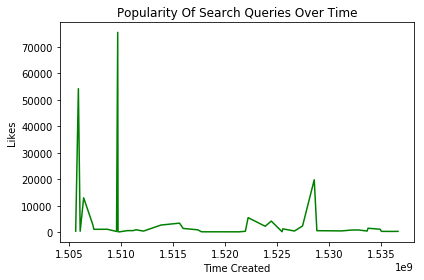

In [19]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()